Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3333 - val_loss: 0.0928
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0457 - val_loss: 0.0152
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0056
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0042
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 
Test Loss: 0.0035
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


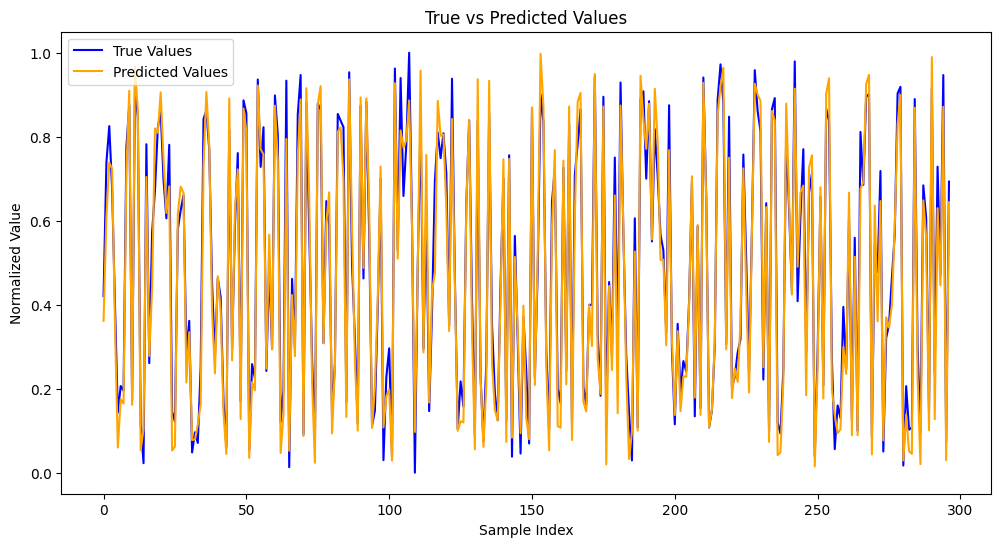

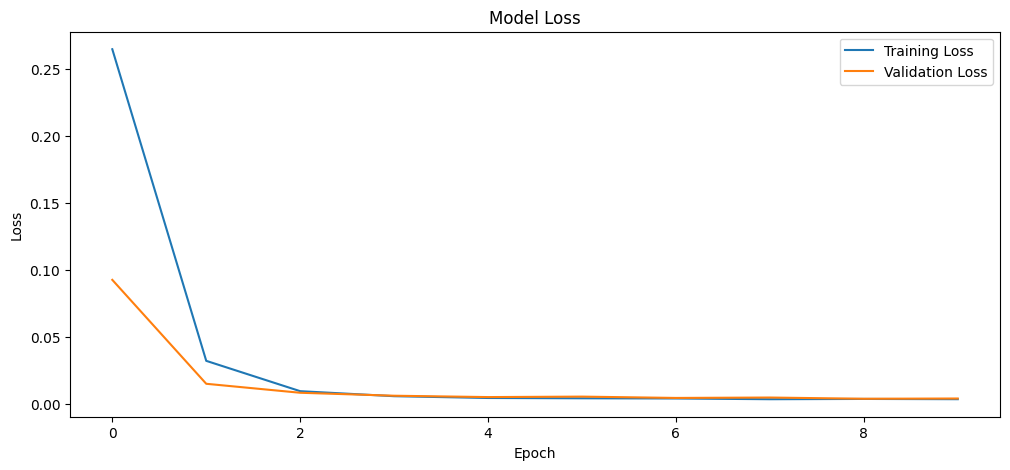

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models

def generate_sine_wave_data(num_samples, time_steps):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, num_samples)  # Sine wave with noise
    return y

# Parameters
num_samples = 1000
time_steps = 10
#  data
data = generate_sine_wave_data(num_samples, time_steps)

X, y = [], []
for i in range(len(data) - time_steps):
    X.append(data[i:i + time_steps])
    y.append(data[i + time_steps])  # Predict the next value

X, y = np.array(X), np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = models.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Values', color='orange')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

